In [18]:
import tensorflow as tf
from tensorflow import keras

# Bibliotecas Auxiliares
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.15.0


In [19]:
fashion_mnist = keras.datasets.fashion_mnist

In [20]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [22]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 3s 1us/step


In [23]:
train_images.shape

(60000, 28, 28)

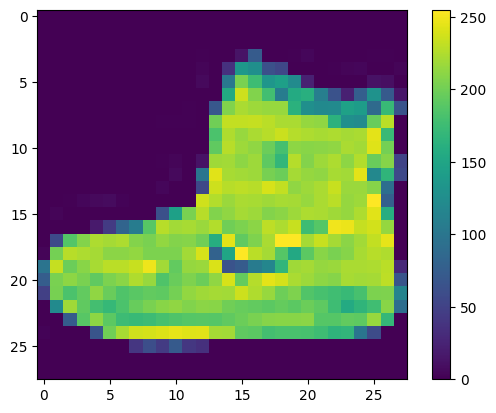

In [24]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
#Escalaremos esses valores no intervalo de 0 e 1 antes de alimentar o modelo da rede neural. Para fazer isso, dividimos os valores por 255. É importante que o conjunto de treinamento e o conjunto de teste podem ser pré-processados do mesmo modo:

In [25]:
train_images = train_images / 255.0

test_images = test_images / 255.0

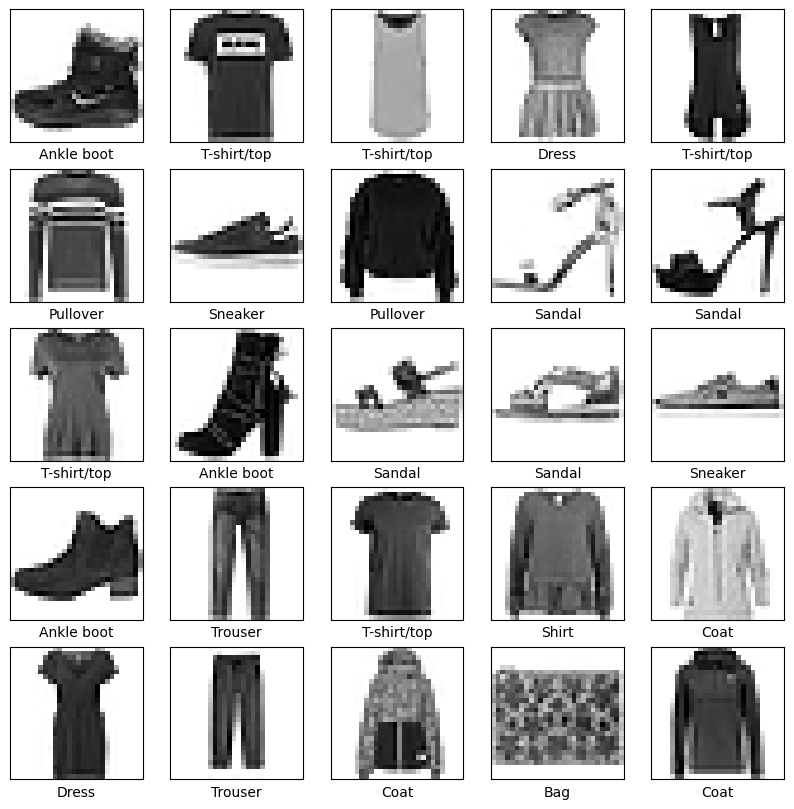

In [26]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [27]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [28]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
model.fit(train_images, train_labels, epochs=10)

2024-01-13 10:20:12.350902: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4998 - accuracy: 0.8243
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3773 - accuracy: 0.8648
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3361 - accuracy: 0.8776
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3113 - accuracy: 0.8865
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2928 - accuracy: 0.8925
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2797 - accuracy: 0.8970
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2684 - accuracy: 0.9000
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2575 - accuracy: 0.9041
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2461 - accuracy: 0.9085
Epoch 10/10
1875/1875 [==============================] - 10s 6ms/step - lo

In [30]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

2024-01-13 10:22:09.274348: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 - 1s - loss: 0.3580 - accuracy: 0.8773 - 1s/epoch - 4ms/step

Test accuracy: 0.8773000240325928


In [31]:
predictions = model.predict(test_images)

2024-01-13 10:22:50.106721: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 1s 3ms/step


In [32]:
predictions[0]

array([4.8761937e-08, 1.0135600e-08, 1.3170834e-09, 6.6594069e-10,
       1.9505779e-09, 5.2017625e-04, 5.6415153e-09, 7.8924177e-03,
       1.5895927e-07, 9.9158734e-01], dtype=float32)

In [ ]:
#A predição é um array de 10 números, ṕos foi usado a func softmax . Eles representam um a confiança do modelo que a imagem corresponde a cada um dos diferentes artigos de roupa. Podemos ver cada label tem um maior valor de confiança:

In [33]:
np.argmax(predictions[0])

9

In [ ]:
#Então, o modelo é confiante de que esse imagem é uma bota (ankle boot) ou class_names[9]. Examinando a label do teste, vemos que essa classificação é correta

In [34]:
test_labels[0]

9

In [ ]:
#Podemos mostrar graficamente como se parece em um conjunto total de previsão de 10 classes.

In [35]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

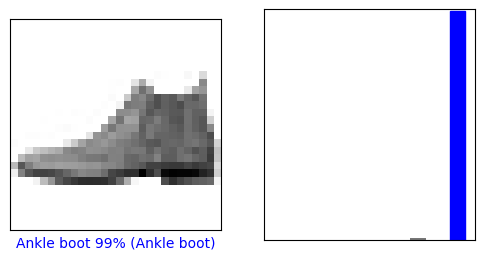

In [36]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

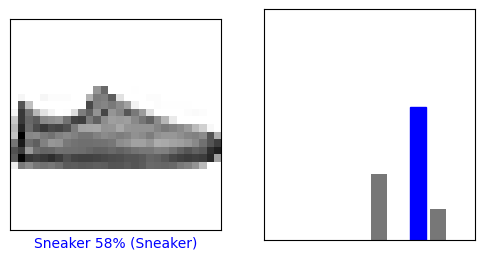

In [37]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

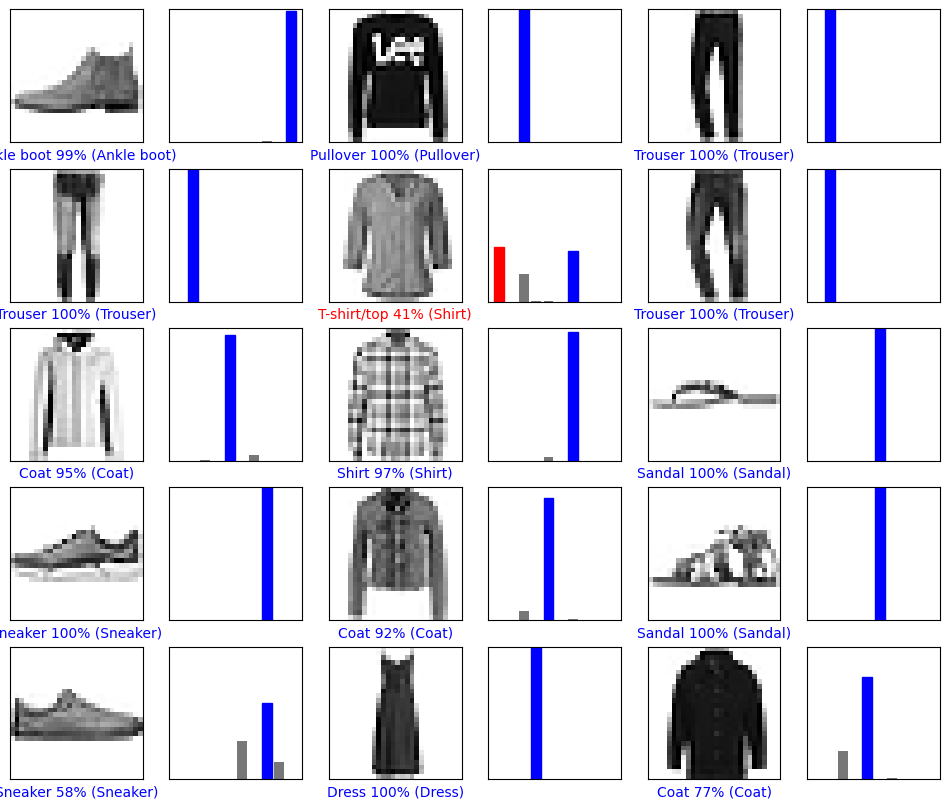

In [38]:
# Plota o primeiro X test images, e as labels preditas, e as labels verdadeiras.
# Colore as predições corretas de azul e as incorretas de vermelho.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [39]:
# Finamente, use o modelo treinado para fazer a predição de uma única imagem.
img = test_images[0]

print(img.shape)

(28, 28)


In [40]:
# Adiciona a imagem em um batch que possui um só membro.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [41]:
#Agora prediremos a label correta para essa imagem
predictions_single = model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 36ms/step
[[4.8761933e-08 1.0135599e-08 1.3170833e-09 6.6594064e-10 1.9505815e-09
  5.2017620e-04 5.6415250e-09 7.8924168e-03 1.5895954e-07 9.9158722e-01]]


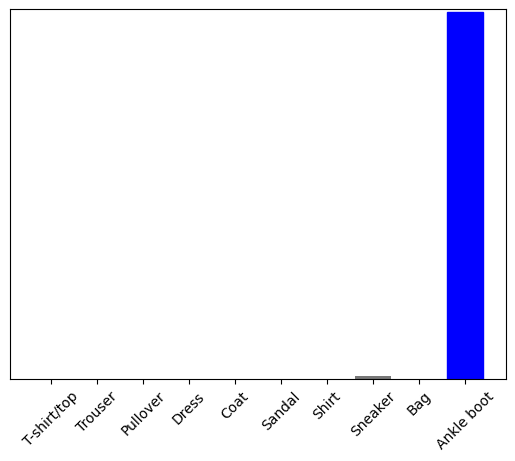

In [42]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)